In [9]:
import pandas as pd
%matplotlib inline

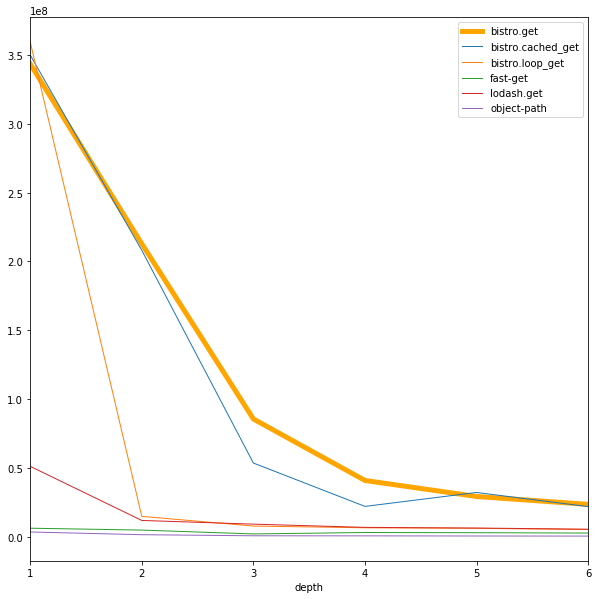

In [50]:
perf = pd.read_json('./.tmp/perf.json')
status = set(perf['status'])
primary = 'bistro.get'
libs = sorted(list(perf['name'].unique()))
libs.remove(primary)
libs = [primary] + libs
ax = None
for lib in libs:
    ax = perf[(perf['status'] == 'ok') & (perf['name'] == lib) & (perf['depth'] <= 6)].plot(
        ax=ax, 
        x='depth',
        y='opsPerSec',
        linewidth=5 if lib == primary else 1,
        color='orange' if lib == primary else None,
        figsize=(10,10),
        label=lib)

In [71]:
perf = perf.reset_index().set_index(['depth', 'status'])
cmp = pd.DataFrame({'lg': perf[perf['name'] == 'lodash.get']['opsPerSec'], 'bg': perf[perf['name'] == 'bistro.get']['opsPerSec'] })
cmp['ratio'] = cmp['bg'] / cmp['lg']
cmp = cmp.reset_index()
cmp[cmp['status'] == 'ok']

,depth,status,bg,lg,ratio
0,1,ok,3.434069e+08,5.103517e+07,6.728829
2,2,ok,2.126989e+08,1.171635e+07,18.154013
4,3,ok,8.543617e+07,9.036504e+06,9.454560
6,4,ok,4.076152e+07,6.686840e+06,6.095782
8,5,ok,2.912746e+07,6.196087e+06,4.700944
10,6,ok,2.339292e+07,5.357529e+06,4.366364
12,7,ok,2.334544e+07,4.425271e+06,5.275484
14,8,ok,1.951450e+07,3.778768e+06,5.164249
16,9,ok,2.152823e+07,3.518332e+06,6.118873
18,10,ok,1.874684e+07,3.626602e+06,5.169257
